# 스타벅스와 이디야 

- 자료 위치 : 소상공인시장진흥공단_상가업소정보_201806

https://www.data.go.kr/dataset/15012005/fileData.do

201806년도 자료받기 
상공인시장진흥공단_상가업소정보_201806.zip

압축해제 

# 환경설정

In [2]:
import pandas as pd
import numpy as np
import re

# 경고 메세지 없애기
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

import seaborn as sns

# 지도 표현
import folium

# ggplot
from plotnine import *

Malgun Gothic


### 소상공인시장진흥공단_상가업소정보_201806_01.csv 데이타프레임 생성 

shop_2018 = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
shop_2018.head()

In [4]:
shop_2018 = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
shop_2018.shape

(476183, 39)

In [6]:
shop_2018.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# '커피' 글자가 포함된 데이타로 데이타프레임 생성하기 

데이타프레임명 = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]


coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

In [7]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [8]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
coffee.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315
19,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
25,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
34,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274


### 커피관련 상호명 확인하기 

In [10]:
coffee['상호명'].unique()

array(['엘가커피부산아시아드점', '서울모드', '커피빈코리아선릉로93길점', ..., '알콩커피', '프라빈커피',
       '돌담커피'], dtype=object)

In [8]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(13472,)

## 스타벅스 데이타만 추출하기 

coffee.loc[coffee['상호명'].str.contains('스타벅스')].head()

In [11]:
coffee.loc[coffee['상호명'].str.contains('스타벅스')].shape

(537, 39)

## 스타벅스 상호명 목록 확인하기 

coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

In [13]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

len(coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique())

In [14]:
len(coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique())

229

## 지역 확인하기 - 시도명, 시군구명

In [16]:
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [18]:
coffee['시도명'].unique()

array(['부산광역시', '서울특별시'], dtype=object)

coffee['시군구명'].value_counts()

coffee['시군구명'].unique()

## '커피' 가 포함된 데이타의 상권업종중분류명 확인하기 

In [20]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

# --------------------

# '서울' 지역의 데이타프레임 생성하기

### 시도명 컬럼값에서 서울로 시작하는 데이타만 추출해서 새로운 데이타프레임 생성하기 

데이타프레임명2 = 데이타프레임명1.loc[데이타프레임명1['시도명'].str.startswith(키워드)].copy()

df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

In [15]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

## 결측치 확인하기

df_seoul.isnull().sum()

## 상권업종 확인하기 

df_seoul['상권업종대분류명'].value_counts()

## 서울의 위도, 경도 데이타 정보 확인하기 

df_seoul[['위도', '경도']].describe(include=np.number)

## seanborn을 이용한 시각화

### 서울의 상권업종 countplot

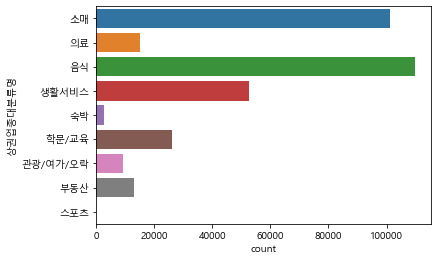

In [27]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

## 서울의 음식 상권 분석과 시각화

In [35]:
df_seoul['상권업종대분류명'].unique()

array(['소매', '의료', '음식', '생활서비스', '숙박', '학문/교육', '관광/여가/오락', '부동산', '스포츠'],
      dtype=object)

df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

In [32]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

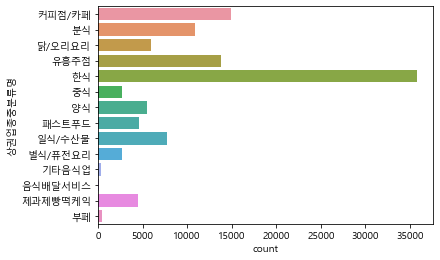

In [33]:
sns.countplot(data=df_food, y="상권업종중분류명")

## 퀴즈

- '상권업종중분류명'이 '패스트푸드'인 데이타프레임 df_fastFood 을 정의하여라 
- '상권업종중분류명'이 '패스트푸드'인 데이타프레임의 상호명은 모두 몇개인가?
- '상권업종중분류명'이 '패스트푸드'인 데이타프레임에서 가장 많은 상호명은?
- 서울에 있는 '피자'가 포함된 상호명 목록을 출력하여라
- 서울 강남구에 있는 도미노피자의 지점명을 모두 출력하여라 

df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

In [36]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(4605, 39)

In [39]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

In [40]:
df_fast_food['상호명'].unique().shape

(2747,)

In [44]:
df_fast_food['상호명'].value_counts()

피자스쿨                   106
배스킨라빈스31               101
던킨도너츠                   83
롯데리아                    72
도미노피자                   62
피자마루                    59
한솥                      56
베스킨라빈스                  54
버거킹                     53
이삭토스트                   53
59피자                    50
한솥도시락                   46
맥도날드                    45
배스킨라빈스                  40
본도시락                    37
파파존스피자                  35
피자헛                     35
피자나라치킨공주                34
미스터피자                   33
봉구스밥버거                  31
써브웨이                    28
피자알볼로                   27
명랑핫도그                   24
명랑시대쌀핫도그                24
맘스터치                    20
서브웨이                    19
죠샌드위치                   17
빨간모자피자                  16
피자애                     16
피자에땅                    16
                      ... 
버거킹고대중앙광장점               1
롯데리아인재개발센타               1
롯데리아강남우성사거리점             1
자니로켓현대카드점                1
피자꾼떡전교점                  1
ABC치킨앤러브러브피자             1
수

In [53]:
pd.DataFrame(df_fast_food['상호명'].value_counts()).iloc[0]

상호명    106
Name: 피자스쿨, dtype: int64

In [56]:
df_seoul['상호명'][df_seoul['상호명'].str.contains('피자')].shape

(1617,)

df_seoul['상호명'][df_seoul['상호명'].str.contains('피자')].unique()

df_seoul['시군구명'].unique()

In [66]:
# df_seoul['시군구명']=='강남구'
# df_seoul['상호명'].str.contains('도미노피자')

df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]

df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]['지점명']

In [67]:
df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
12897,20561849,도미노피자,일원점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168011400106870007002760,NaN,서울특별시 강남구 일원로9길 18,135230,6343.0,NaN,1,NaN,127.083096,37.489635
54507,20419152,도미노피자,역삼점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010100107210036023754,태현빌딩,서울특별시 강남구 언주로 413,135080,6222.0,NaN,1,NaN,127.043581,37.499828
86811,20019922,도미노피자,압구정점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010700106380002009656,NaN,서울특별시 강남구 압구정로 306,135896,6017.0,NaN,1,NaN,127.034736,37.528843
150920,20089674,도미노피자,삼성점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010500100440018016108,NaN,서울특별시 강남구 봉은사로 451,135090,6097.0,NaN,1,NaN,127.048990,37.512036
156492,25972841,도미노피자,개포점,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,I56199,...,1168011800109430000000288,뱅뱅빌딩,서울특별시 강남구 강남대로 292,135270,6258.0,1,4,NaN,127.032180,37.489364
261499,20027266,도미노피자,NaN,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010100107790008024869,NaN,서울특별시 강남구 언주로 315,135080,6229.0,NaN,5,NaN,127.045508,37.495915
304199,20029019,도미노피자개포점,개포점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010300102280003020819,동진빌딩,서울특별시 강남구 논현로 58,135240,6312.0,NaN,1,NaN,127.047203,37.475547
397288,12087838,도미노피자역삼점,역삼점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1168010100107890000025387,동아빌딩,서울특별시 강남구 역삼로 146,135080,6249.0,NaN,1,NaN,127.035337,37.494508


In [69]:
df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]['지점명']

12897      일원점
54507      역삼점
86811     압구정점
150920     삼성점
156492     개포점
261499     NaN
304199     개포점
397288     역삼점
Name: 지점명, dtype: object

# ----------------

# 베스킨라빈스와 던킨도너츠 

## 배스킨라빈스와 던킨도너츠 데이타프레임 생성

```
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape
```

In [16]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(438, 39)

In [17]:
df_31.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 컬럼명 정리

df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

In [71]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [72]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
63,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2459,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동


df_31['상호명'].value_counts()

## 브랜드명 컬럼 추가하기 

In [19]:
df_31['브랜드명'] = ''

df_31[['상호명', '브랜드명']].head()

df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [20]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [21]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
63,배스킨라빈스,배스킨라빈스
1564,던킨도너츠테크노마트점,던킨도너츠
1921,던킨도너츠창동하나로,던킨도너츠
1958,던킨도너츠용산민자역사2호,던킨도너츠
2459,던킨도너츠,던킨도너츠


In [78]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    290
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [81]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배 많다.'.format(df_31_ratio))

던킨도너츠보다 배스킨라빈스의 매장이 1.96배 많다.
